### Bethanie Williams
### CSC 5220 Data Mining and Machine Learning
### Lab 2 Assignment 
### Date: 9/17/20

In [1]:
import pandas as pd
import numpy as np
import matplotlib   # import python libraries that I will need to use
import pylab
import sklearn
import scipy

In [2]:
from pandas import read_csv
from matplotlib import pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn import linear_model
from sklearn.datasets.samples_generator import make_regression 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

C:\Users\betha\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


## Step 1:

In [3]:
dataset = read_csv(r'C:\Users\betha\OneDrive\Documents\CSC5220\Lab2_dataset.csv')  # importing csv
print(dataset)

    x_training  y_training   x_test    y_test    x_val      y_val
0     -15.9368      2.1343 -33.3180   3.31690 -16.7465   4.170200
1     -29.1530      1.1733 -37.9122   5.39770 -14.5775   4.067300
2      36.1895     34.3591 -51.2069   0.13043  34.5158  31.873100
3      37.4922     36.8380  -6.1326   6.19260 -47.0101  10.623700
4     -48.0588      2.8090  21.2612  17.08850  36.9751  31.836000
5      -8.9415      2.1211 -40.3195   0.79951 -40.6861   4.959400
6      15.3078     14.7103 -14.5415   2.82480  -4.4720   4.451600
7     -34.7063      2.6142  32.5598  28.62120  26.5336  22.276300
8       1.3892      3.7402  13.3934  17.04640 -42.7977  -0.000044
9     -44.3838      3.7317  44.2099  55.38440  25.3741  20.503800
10      7.0135      7.6277  -1.1427   4.07940 -31.1096   3.858300
11     22.7627     22.7524 -12.7669   8.27040  27.3118  19.365100
12         NaN         NaN  34.0545  31.32360  -3.2639   4.883800
13         NaN         NaN  39.2235  39.15910  -1.8183  11.097200
14        

In [4]:
print("Training Set: ")  # defining training set
x_training = dataset.iloc[:12, :1]  # gets rows until the 12th row and first two columns
y_training = dataset.iloc[:12, 1:2]
training_set = print(dataset[["x_training", "y_training"]])
print()

print("Test Set:")  # defining test set
x_testing = dataset.iloc[:, 2:3]  # gets all rows and next two columns
y_testing = dataset.iloc[:, 3:4]
testing_set =  print(dataset[["x_test", "y_test"]])
print()

print("Validation Set:")  # defining validation set
x_validate = dataset.iloc[:, 4:5]  # gets all rows and last two columns
y_validate = dataset.iloc[:, 5:6]
validation_set =  print(dataset[["x_val", "y_val"]])
print()

Training Set: 
    x_training  y_training
0     -15.9368      2.1343
1     -29.1530      1.1733
2      36.1895     34.3591
3      37.4922     36.8380
4     -48.0588      2.8090
5      -8.9415      2.1211
6      15.3078     14.7103
7     -34.7063      2.6142
8       1.3892      3.7402
9     -44.3838      3.7317
10      7.0135      7.6277
11     22.7627     22.7524
12         NaN         NaN
13         NaN         NaN
14         NaN         NaN
15         NaN         NaN
16         NaN         NaN
17         NaN         NaN
18         NaN         NaN
19         NaN         NaN
20         NaN         NaN

Test Set:
     x_test    y_test
0  -33.3180   3.31690
1  -37.9122   5.39770
2  -51.2069   0.13043
3   -6.1326   6.19260
4   21.2612  17.08850
5  -40.3195   0.79951
6  -14.5415   2.82480
7   32.5598  28.62120
8   13.3934  17.04640
9   44.2099  55.38440
10  -1.1427   4.07940
11 -12.7669   8.27040
12  34.0545  31.32360
13  39.2235  39.15910
14   1.9745   8.08730
15  29.6218  24.11130
16 -23

In [5]:
# Turning data sets into arrays
x = np.array(x_training.values)  # array = dataset.values
x = x[np.logical_not(np.isnan(x))]  # remove nan values from my array
# print(x)
# print()

y = np.array(y_training.values)
y = y[np.logical_not(np.isnan(y))]  # remove nan values from my array
# print(y)
# print()

x_test = np.array(x_testing.values)
# print(x_test)
# print()

y_test = np.array(y_testing.values)
# print(y_test)
# print()

x_val = np.array(x_validate.values)
# print(x_val)
# print()

y_val = np.array(y_validate.values)
# print(y_val)
# print()

In [6]:
print("Training Data:") # print training data out to ensure correct values
print()

print(x)  # printing x training values
print()
print(y)  # printing y training values

Training Data:

[-15.9368 -29.153   36.1895  37.4922 -48.0588  -8.9415  15.3078 -34.7063
   1.3892 -44.3838   7.0135  22.7627]

[ 2.1343  1.1733 34.3591 36.838   2.809   2.1211 14.7103  2.6142  3.7402
  3.7317  7.6277 22.7524]


###############################################################################################################################

## Step 2:

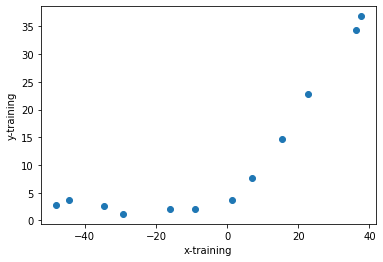

In [7]:
x_train = dataset['x_training'].tolist()  # plotting training data
y_train = dataset['y_training'].tolist()
plt.scatter(x_train, y_train)  # scattter plot of data
plt.xlabel('x-training')  # labels x-axis
plt.ylabel('y-training')  # labels y-axis
plt.show()  # displays scatter plot

###############################################################################################################################

## Step 3:

In [8]:
def gradient_descent(alpha, x, y, lamb=0, conv=0.0001, max_iter=10000): # input alpha=learning rate, x and = data,
    converged = False                                                   #  convergence thresh= 0.0001, max_iter = 10000
    iteration = 0 # set iteration counter to 0
    m = x.shape[0] # number of samples
    t_n = ([0.0,0.0])  # initial theta
    num_thetas = len(t_n) # length of theta array

    # total error, J(theta)
    J = sum([(t_n[0] + t_n[1]*x[i] - y[i])**2 for i in range(m)]) + (lamb * sum(t_n[i] ** 2 for i in range(num_thetas)))

    while not converged:# Iterate Loop until convergence has happened
        
        # for each training sample, compute the gradient (d/d_theta j(theta))
        grad0 = 1.0/m * sum([(t_n[0] + t_n[1]*x[i] - y[i]) for i in range(m)]) 
        grad1 = 1.0/m * sum([(t_n[0] + t_n[1]*x[i] - y[i])*x[i] for i in range(m)])

        # update the theta_temp
        temp0 = t_n[0] - alpha * grad0
        temp1 = ((1.0 -((alpha * lamb)/m)) * t_n[1]) - alpha * grad1
    
        # update theta
        t_n[0] = (temp0)
        t_n[1] = (temp1)

        # mean squared error
        e = sum([ (t_n[0] + t_n[1]*x[i] - y[i])**2 for i in range(m)]) + (lamb * sum([t_n[i]**2 for i in range(num_thetas)])) 
        
        if abs(J-e) <= conv: 
            print('Converged, iterations: ', iteration, '!!!')
            converged = True
    
        J = e   # update error 
        iteration += 1  # update iter
    
        if iteration == max_iter:
            print('Max interactions exceeded!')
            converged = True
            
        for i in range(num_thetas):
            y_predict = t_n[0] + t_n[1]*x
    
    print("Theta0 =", t_n[0], "Theta1 =", t_n[1]) # theta0 is y-intercept, theta1 is slope

    return t_n[0], t_n[1]  # returns theta0 and theta1

In [9]:
theta0, theta1= gradient_descent(0.001, x, y)
# print (theta0, theta1)

Converged, iterations:  5445 !!!
Theta0 = 13.021432891787487 Theta1 = 0.36738026698713894


################################################################################################################################

## Step 4:

In [10]:
def work_properly(alpha, x, y, lamb=0, conv=0.0001, max_iter=10000): # input alpha=learning rate, x and = data,
    converged = False                                                   #  convergence thresh= 0.0001, max_iter = 10000
    iteration = 0  # set iteration counter to 0
    m = x.shape[0] # number of samples
    t_n = ([0.0,0.0]) # initial theta
    num_thetas = len(t_n) # length of theta array

    # total error, J(theta)
    J = sum([(t_n[0] + t_n[1]*x[i] - y[i])**2 for i in range(m)]) + (lamb * sum(t_n[i] ** 2 for i in range(num_thetas)))

    while not converged: # Iterate Loop until convergence has happened
        
        # for each training sample, compute the gradient (d/d_theta j(theta))
        grad0 = 1.0/m * sum([(t_n[0] + t_n[1]*x[i] - y[i]) for i in range(m)]) 
        grad1 = 1.0/m * sum([(t_n[0] + t_n[1]*x[i] - y[i])*x[i] for i in range(m)])

        # update the theta_temp
        temp0 = t_n[0] - alpha * grad0
        temp1 = ((1.0 -((alpha * lamb)/m)) * t_n[1]) - alpha * grad1
    
        # update theta
        t_n[0] = (temp0)
        t_n[1] = (temp1)

        # mean squared error
        e = sum([ (t_n[0] + t_n[1]*x[i] - y[i])**2 for i in range(m)]) + (lamb * sum([t_n[i]**2 for i in range(num_thetas)])) 
        
        if abs(J-e) <= conv:
            converged = True
    
        J = e   # update error 
        iteration += 1  # update iter
    
        if iteration == max_iter:
            print('Max interactions exceeded!')
            converged = True
        
        for i in range(num_thetas):
            y_predict = t_n[0] + t_n[1]*x

            plt.plot(iteration, J, 'o')
            plt.xlabel('Iterations')  # labels x-axis
            plt.ylabel('J theta')  # labels y-axis


    return J, iteration-1

Jtheta and Number of Iterations:
(537.024955872586, 5445)


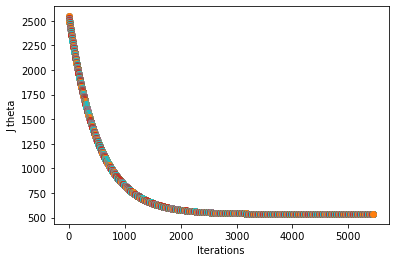

In [11]:
print("Jtheta and Number of Iterations:")
results= work_properly(0.001, x, y)
print (results)

################################################################################################################################

## Step 5:

In [12]:
 def regression_prediction(t0, t1, x):
    prediction = t0
    prediction += t1*x
    return prediction

test_predicted_values = []

for i in np.nditer(x_test):
    test_predicted_value = regression_prediction(theta0, theta1, i)
    test_predicted_values.append(test_predicted_value)
print(test_predicted_values)

[0.7810571563099895, -0.9067612662823201, -5.790971701796238, 10.76843666646216, 20.832378224254445, -1.7911557830004607, 7.679172739394007, 24.983260908835334, 17.941903759653034, 29.263277757262202, 12.601627460701284, 8.331125761189384, 25.53238419390101, 27.431372793957532, 13.746825228953593, 23.903897684427122, 4.325688924308704, 9.71067540175279, -7.530039671633258, -0.09720210994946044, 16.515292706888577]


In [13]:
# regression_prediction(theta0, theta1, x_test)

################################################################################################################################

## Step 6:

In [14]:
def evaluate_MSE(pred, ytest):
    m = x_test.shape[0]
    MSE = (1/(m))*sum([(pred[i]-ytest[i])**2 for i in range(m)])
#     print(MSE)
    return MSE
              
evaluation = evaluate_MSE(test_predicted_values, y_test)
print("MSE:", evaluation)

MSE: [65.29849453]


In [15]:
# evaluate_MSE(prediction, y_test)

################################################################################################################################

## Step 7:

In [52]:
def plot_test():
    x_2d = np.reshape(x, (-1,1))
    x_2d_test = np.reshape(x_test, (-1,1))
    skit = linear_model.LinearRegression()  # using skit learn
    skit.fit(x_2d, y)   # fitting data
    y_test_predict = skit.predict(x_2d_test) # predicting y test value

    plt.scatter(x_2d, y, c= "blue", label = "original data")
    plt.plot(x_test, test_predicted_values, label = "my linear version")
    plt.plot(x_test, y_test_predict, linestyle = ":", c= "orange", label = "skit version")
    plt.xlabel('x')  # labels x-axis
    plt.ylabel('y')  # labels y-axis
    plt.legend(loc = "best")  # puts legend in best location
    plt.show()

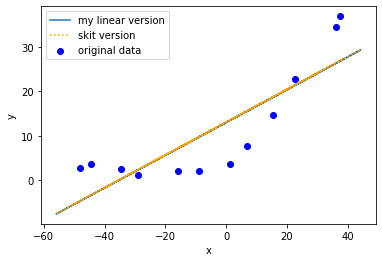

In [53]:
plot_test()

In [18]:
################################################################################################################################

## Step 8:

In [21]:
# def learning_curves():
#      # instantiate
#     lg = LinearRegression()

#     # fit
#     x_2d = np.reshape(x, (-1,1))
#     lg.fit(x_2d, y)
    
    
#     train_sizes, training_set, testing_set = learning_curve(lg, x_2d, y, train_sizes=np.linspace(.1, 1.0, 5))
    
#     train_set_mean = np.mean(training_set, axis=1)
#     train_set_std = np.std(training_set, axis=1)
#     test_set_mean = np.mean(testing_set, axis=1)
#     test_set_std = np.std(testing_set, axis=1)
    
#     plt.figure()
#     plt.title("RandomForestClassifier")
#     plt.legend(loc="best")
#     plt.xlabel("Training examples")
#     plt.ylabel("Score")
#     plt.gca().invert_yaxis()
    
#     # plot the std deviation as a transparent range at each training set size
#     plt.fill_between(train_sizes, train_set_mean - train_set_std, train_set_mean + train_set_std, alpha=0.01, color="r")
#     plt.fill_between(train_sizes, test_set_mean - test_set_std, test_set_mean + test_set_std, alpha=0.01, color="g")
    
    
#     # plot the average training and test score lines at each training set size
#     plt.plot(train_sizes, train_set_mean, 'o-', color="r", label="Training score")
#     plt.plot(train_sizes, test_set_mean, 'o-', color="g", label="Cross-validation score")
    
#     plt.show()

# def learning_curves(x, y, x_val, y_val):

# def regression_for_validation(t0, t1, x):
#     prediction = t0
#     prediction += t1*x
#     return prediction

# test_predicted_values = []

# for i in np.nditer(x_val):
#     test_predicted_value = regression_prediction(theta0, theta1, i)
#     test_predicted_values.append(test_predicted_value)
# print(test_predicted_values)
# print()


# def regression_for_train(t0, t1, x):
#     prediction = t0
#     prediction += t1*x
#     return prediction

# test_predicted_values = []

# for i in np.nditer(x):
#     test_predicted_value = regression_prediction(theta0, theta1, i)
#     test_predicted_values.append(test_predicted_value)
# print(test_predicted_values)
# print()

#     train = [None] * 12
#     validation = [None] * 12

# for i in range(1,12):
#     gradient_descent(0.001, x[0:i], y[0:i])
#     train[i] = theta0 + theta1 * x[i]
#     val[i] = theta0 + theta1 * x_val[i]
#     print()
    
# print("Train Split Arrays", train)
# print()
# print("Validate Split Array", val)
# print()

# MSE_train = [None] *12
# MSE_validation = [None] * 12

# for i in range (1,12):
#     MSE_train[i] = evaluate_MSE([x][0:i], train[i])
#     MSE_validation[i] = evaluate_MSE(y_val[0:i], val[i])
    
# print(MSE_train)
# print()
# print(MSE_validation)
    
    
# # def evaluate_MSE(pred, y):
# #     m = len(pred)
# #     MSE = (1/(m))*sum([(pred[i]-y[i])**2 for i in range(m)])
# #     #     print(MSE)
# #     return MSE

# # evaluation = evaluate_MSE(test_predicted_values, y)
# # print("MSE:", evaluation)
# # print()

# # def evaluate_MSE(pred, y_val):
# #     m = len(pred)
# #     MSE = (1/(m))*sum([(pred[i]-y_val[i])**2 for i in range(m)])
# #     #     print(MSE)
# #     return MSE

# # evaluation = evaluate_MSE(test_predicted_values, y_val)
# # print("MSE:", evaluation)
# # print()

# plt.plot(x[i], y[i], c='r', label = "my linear version")
# # plt.plot(x_test, y_test_predict, linestyle = ":", c= "r", label = "skit version")
# plt.xlabel('training')  # labels x-axis
# plt.ylabel('validate')  # labels y-axis
# plt.legend(loc = "best")  # puts legend in best location
# plt.show()       
#     def MSE(pred, ytest):
#         m = x.shape[0]
#         MSE = (1/(m))*sum([(pred[i]-ytest[i])**2 for i in range(m)])
#     #     print(MSE)
#         return MSE
    
#         def MSE(pred, ytest):
#             j = x_val.shape[0]
#             MSE = (1/(m))*sum([(pred[i]-ytest[i])**2 for i in range(m)])
#         #     print(MSE)
#             return MSE

# evaluation = evaluate_MSE(test_predicted_values, y_test)
# print("MSE:", evaluation)m = x.shape[0]
   
    
#     j = x_val.shape[0]
#     MSE = (1/(m))*sum([(pred[i]-y_val[i])**2 for i in range(j)])
#     print(MSE)
              
    
    

In [22]:
# learning_curves(x,y,x_val,y_val)

###############################################################################################################################

## Step 9:

In [54]:
def normalization_func(x):
    normalized_array = []
    for i in x:
        normalize= (i-np.min(x))/(np.max(x)-np.min(x))
        normalized_array.append(normalize)
    return normalized_array
        

In [55]:
normalization_func(x)

[0.37547194071372636,
 0.22098865004500237,
 0.9847728255660367,
 1.0,
 0.0,
 0.4572395413262265,
 0.740688010660308,
 0.15607649238465945,
 0.5779944126895069,
 0.042956832766420004,
 0.643736484669963,
 0.8278278453787801]

###############################################################################################################################

## Step 10:

In [44]:
def polynomial_descent(alpha, x, y, lamb=0, conv=0.0001, max_iter=10000): # input alpha=learning rate, x and = data,
    converged = False                                                   #  convergence thresh= 0.0001, max_iter = 10000                                                 
    iteration = 0  # set iteration counter to 0
    normalizing_x = normalization_func(x) # making x values be normalized
    m = x.shape[0] # number of samples
    t_n = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]   # initial thetas
    num_thetas = len(t_n) # length of theta array

    # total error, J(theta)
    J = sum([ (t_n[0] + t_n[1]*x[i] + t_n[2]*x[i] **2 + t_n[3]*x[i] **3 + t_n[4]*x[i] **4 + t_n[5]*x[i] **5 + 
                t_n[6]*x[i] **6 + t_n[7]*x[i] **7 + t_n[8]*x[i] **8 - y[i])**2 for i in range(m)]) + (lamb * sum([t_n[i]**2 for i in range(num_thetas)])) 

    while not converged: # Iterate Loop until convergence has happened
        
        # for each training sample, compute the gradient (d/d_theta j(theta))
        grad0 = 1.0/m * sum([(t_n[0] + t_n[1]*x[i] - y[i]) for i in range(m)]) 
        grad1 = 1.0/m * sum([(t_n[0] + t_n[1]*x[i] - y[i])*x[i] for i in range(m)])
        grad2 = 1.0/m * sum([(t_n[0] + t_n[1]*x[i] + t_n[2]*x[i] - y[i])*x[i] for i in range(m)])
        grad3 = 1.0/m * sum([(t_n[0] + t_n[1]*x[i] +t_n[2]*x[i] + t_n[3]*x[i] - y[i])*x[i] for i in range(m)])
        grad4 = 1.0/m * sum([(t_n[0] + t_n[1]*x[i] + t_n[2]*x[i] +t_n[3]*x[i] + t_n[4]*x[i]  - y[i])*x[i] for i in range(m)])
        grad5 = 1.0/m * sum([(t_n[0] + t_n[1]*x[i] + t_n[2]*x[i] + t_n[3]*x[i] +t_n[4]*x[i] + t_n[5]*x[i] - y[i])*x[i] for i in range(m)])
        grad6 = 1.0/m * sum([(t_n[0] + t_n[1]*x[i] + t_n[2]*x[i] + t_n[3]*x[i] + t_n[4]*x[i] +t_n[5]*x[i] + t_n[6]*x[i] - y[i])*x[i] for i in range(m)])
        grad7 = 1.0/m * sum([(t_n[0] + t_n[1]*x[i] + t_n[2]*x[i] + t_n[3]*x[i] + t_n[4]*x[i] +t_n[5]*x[i] + t_n[6]*x[i] + t_n[7]*x[i] - y[i])*x[i] for i in range(m)])
        grad8 = 1.0/m * sum([(t_n[0] + t_n[1]*x[i] + t_n[2]*x[i] + t_n[3]*x[i] + t_n[4]*x[i] +t_n[5]*x[i] + t_n[6]*x[i] + t_n[7]*x[i] + t_n[8]*x[i] - y[i])*x[i] for i in range(m)])

        # update the theta_temp
        temp0 = t_n[0] - alpha * grad0
        temp1 = ((1.0 -((alpha * lamb)/m)) * t_n[1]) - alpha * grad1
        temp2 = ((1.0 -((alpha * lamb)/m)) * t_n[2]) - alpha * grad2
        temp3 = ((1.0 -((alpha * lamb)/m)) * t_n[3]) - alpha * grad3
        temp4 = ((1.0 -((alpha * lamb)/m)) * t_n[4]) - alpha * grad4
        temp5 = ((1.0 -((alpha * lamb)/m)) * t_n[5]) - alpha * grad5
        temp6 = ((1.0 -((alpha * lamb)/m)) * t_n[6]) - alpha * grad6
        temp7 = ((1.0 -((alpha * lamb)/m)) * t_n[7]) - alpha * grad7
        temp8 = ((1.0 -((alpha * lamb)/m)) * t_n[8]) - alpha * grad8
        
    
        # update theta
        t_n[0] = (temp0)
        t_n[1] = (temp1)
        t_n[2] = (temp2)
        t_n[3] = (temp3)
        t_n[4] = (temp4)
        t_n[5] = (temp5)
        t_n[6] = (temp6)
        t_n[7] = (temp7)
        t_n[8] = (temp8)
        

        # mean squared error
        e = sum([ (t_n[0] + t_n[1]*x[i] + t_n[2]*x[i] **2 + t_n[3]*x[i] **3 + t_n[4]*x[i] **4 + t_n[5]*x[i] **5 + 
                   t_n[6]*x[i] **6 + t_n[7]*x[i] **7 + t_n[8]*x[i] **8 - y[i])**2 for i in range(m)]) + (lamb * sum([t_n[i]**2 for i in range(num_thetas)])) 
        
        if abs(J-e) <= conv:
            converged = True
    
        J = e   # update error 
        iteration += 1  # update iter
    
        if iteration == max_iter:
            converged = True
        
#         for i in range(num_thetas):
#             y_predict = t_n[0] + t_n[1]*x
    
#     polynum_features = PolynomialFeatures(degree=degree)
#     x_2d = np.reshape(x_test, (-1,1))

#     # transforms the existing features to higher degree features.
#     x_train_poly = polynum_features.fit_transform(x_2d)

#     # fit the transformed features to Linear Regression
#     poly_model = LinearRegression()
#     poly_model.fit(x_train_poly, y_test)

#     # predicting on training data-set
#     y_train_predicted = poly_model.predict(x_train_poly)

#     # evaluating the model on training dataset
#     mse_train = mean_squared_error(y_test, y_train_predicted)

#     print("MSE of training set is {}".format(mse_train))
    
#     polynum_features = PolynomialFeatures(8)
#     x_2d = np.reshape(x, (-1,1))
#     x_train =polynum_features.fit_transform(x_2d)
#     rdg = Ridge(alpha = 0.5, normalize= True)
#     rdg.fit(x_train, y)
#     plt.plot(x_train, y)    
    eighth_degree =  t_n[0] + t_n[1]*x + t_n[2]*x**2 + t_n[3]*x**3 + t_n[4]*x**4 + t_n[5]*x**5 + t_n[6]*x**6 + t_n[7]*x**7 + t_n[8]*x**8
    normalizing_eighth_degree = normalization_func(eighth_degree)
    plt.plot(normalizing_eighth_degree, 'k-')
    plt.plot(normalizing_x, 'g*')
    plt.xlabel('x')  # labels x-axis
    plt.ylabel('y')  # labels y-axis
    
#     return t_n[0], t_n[1], t_n[2], t_n[3], t_n[4], t_n[5], t_n[6], t_n[7], + t_n[8]

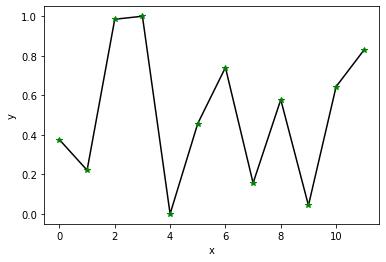

In [45]:
polynomial_descent(0.001, x, y)

###############################################################################################################################

## Step 11

################################################################################################################################

## Step 12:

In [ ]:
def regression_validation_func(t0, t1, xval):
    f_theta = t0
    f_theta += t1*xval
    return f_theta

validate_predicted_values = []

for i in np.nditer(x_val):
    val_predicted_value = regression_validation_func(theta0, theta1, i)
    validate_predicted_values.append(val_predicted_value)
print(validate_predicted_values)

In [ ]:
def evaluate_validation_func(pred, yval):
    m = x_val.shape[0]
    MSE = (1/(2*m))*sum([(pred[i]-yval[i])**2 for i in range(m)])
    return MSE
              
evaluation = evaluate_validation_func(validate_predicted_values, y_val)
print("MSE:", evaluation)

In [ ]:
def exhaustive_search(t0, t1, x_val, y_val):
    lamb = [0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]
    m = x_val.shape[0]
    arr = []

    for i in lamb:
        hi = (lamb) * (t0**2 + t1**2)
        J_bye = sum([(t0 + t1*x_val[i] - y_val[i])**2 for i in range(m)])
        J_total = hi + J_bye
        print(J_total)

hpo = exhaustive_search(theta0, theta1, x_val, y_val)
print(hpo)

################################################################################################################################

## Step 13